In [1]:
from IPython.display import display, clear_output
import keyboard
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ['cmr10'], 
    "axes.labelsize": 20, 
    "axes.titlesize": 22, 
    "xtick.labelsize": 18, 
    "ytick.labelsize": 18, 
    "legend.fontsize": 18,
    "figure.figsize": [12, 7], 
    "figure.dpi": 300 
})



#### Define $S_{21}$($\omega$): 
$$S_{21}(\omega)=1 - \frac{\kappa_c}{i(\Omega-\omega)+\kappa+\frac{g^2}{i(\Delta E-\omega)+\gamma}}$$

In [2]:
def S21 (w, k, kc, Omega, DeltaE, gamma, g):
    up = kc
    down = (Omega - w) - 1j * k - 1j * g**2 / (1j * (DeltaE - w) + gamma)
    t = 1 - up / (1j * down)
    return np.abs(t)

Si jugamos con la función, llegamos a:

$$
t(\omega)=\frac{-\kappa\left[(\Delta E-\omega)-i\gamma\right]}{\left[(\Omega-\omega)(\Delta E-\omega)-\kappa\gamma-g^2\right]-i\left[(\Omega-\omega)\gamma+(\Delta E-\omega)\kappa\right]}
$$

Sacamos los polos de la parte real del denominador, obteniendo:
$$
\omega_\pm=\frac{(\Delta E+\Omega)\pm\sqrt{(\Delta E-\Omega)^2+4(\kappa\gamma+g^2)}}{2}
$$

En acoplo fuerte $(\frac{g^2}{\gamma}\gg 1)$, luego:
$$
\omega_\pm=\frac{(\Delta E+\Omega)}{2}\pm\sqrt{\left(\frac{\Delta E-\Omega}{2}\right)^2+g^2}
$$

Junto a las curvas, dibujaremos líneas verticales correspondientes a esos polos.

En resonancia $(\Delta E=\Omega)$, tenemos dos modos, $$\omega_\pm=\Omega\pm g$$

In [3]:
def w_1(k, Omega, DeltaE, gamma, g):
    return 0.5 * ((DeltaE + Omega) + np.sqrt((DeltaE - Omega)**2 + 4*(k * gamma + g**2)))

def w_2(k, Omega, DeltaE, gamma, g):
    return 0.5 * ((DeltaE + Omega) - np.sqrt((DeltaE - Omega)**2 + 4*(k * gamma + g**2)))

 # NO noise

## Creamos base de datos

In [4]:
# Definimos una función que genere la base de datos
# def Parameters_generator (num_datos):
#     k = np.random.uniform(1e-4, 1e-2, num_datos)
#     kc = np.random.uniform(1e-6, 1e-4, num_datos)
#     gamma = np.random.uniform(1e-4, 1e-2, num_datos)
#     g = np.random.uniform(1e-4, 1e-2, num_datos)
#     DeltaE = np.random.uniform(0.5, 1.5, num_datos)

#     return k, kc, gamma, g, DeltaE

def Parameters_generator (num_datos):
    k = np.random.uniform(2e-4, 6.5e-4, num_datos)
    kc = np.random.uniform(1.5e-5, 3.5e-5, num_datos)
    gamma = np.random.uniform(5e-3, 8e-3, num_datos)
    g = np.random.uniform(1.15e-2, 1.35e-2, num_datos)
    DeltaE = np.random.uniform(1.8, 2.4, num_datos)

    return k, kc, gamma, g, DeltaE

num_datos = 10000

In [5]:
# #Creamos base de datos y guardamos en .txt
# k, kc, gamma, g, DeltaE = Parameters_generator (num_datos)
# np.savetxt('Parameters_noNoise_acotado2.txt', np.column_stack((k, kc, gamma, g, DeltaE)),
#             header='\u03BA \u03BA_c \u213D g \u0394E', encoding='utf8') 

In [6]:
datos = np.loadtxt('Parameters_noNoise.txt', skiprows=1, usecols=(0, 1, 3))
k = datos[:,0]
kc = datos[:,1]
gamma = np.loadtxt('Parameters_noNoise.txt', skiprows=1, usecols=2)
gamma = 1e-3
#gamma = 6.5e-3
g = datos[:,2]
DeltaE = np.loadtxt('Parameters_noNoise.txt', skiprows=1, usecols=4)
Omega = 1
#Omega = 2.116451

#Creamos los valores de y (la función t(w)) con nuestra base de datos
w_values = np.linspace(0.85, 1.15, 2500)
# w_values = np.linspace(2.09, 2.14, 2500)


# Crear una matriz para almacenar los t(w)
t_values = np.zeros((num_datos, len(w_values)))

w1 = w2 = np.zeros(num_datos)
w1=w_1(k, Omega, DeltaE, gamma, g)
w2=w_2(k, Omega, DeltaE, gamma, g)

# Almacenar los resultados en la matriz 
# (elemento [i,j] fila i es el número de combinación de [k, DeltaE, gamma, g] 
# y la comluna j el elemento de w_values)
for i in range(num_datos):
    t_values[i,:] = S21(w_values, k[i], kc[i], Omega, DeltaE[i], gamma, g[i])


### Dibujamos las curvas

In [7]:
# plt.rcParams.update({
#     "text.usetex": False,
#     "font.family": "serif",
#     "font.serif": ['DejaVu Sans'],
# }) # Para visualizar LaTeX es muy lento (cuando sepa cual gráfica guaradr, se hará con latex)

# i=0
# while i<=1000:
#     plt.clf()  # Limpia la figura antes de cada iteración
#     plt.plot(w_values, t_values[i,:], label='Curva original')
#     plt.title(f"Curva número: {i}")
#     plt.xlabel(r"$\omega$")
#     plt.ylabel(r"t ($\omega$)")
#     #plt.legend()
#     # plt.ylim(0) 
#     # plt.xlim(0.85, 1.15) 

#     # # Calcula los valores de t(w) en w1 y w2
#     # t_w1 = t_w(w1[i], k[i], Omega, DeltaE[i], gamma[i], g[i])
#     # t_w2 = t_w(w2[i], k[i], Omega, DeltaE[i], gamma[i], g[i])

#     # if w_values.min() <= w1[i] <= w_values.max():
#     #     plt.vlines(w1[i], 0, t_w1, colors='black', linewidth=0.5)
#     # if w_values.min() <= w2[i] <= w_values.max():
#     #     plt.vlines(w2[i], 0, t_w2, colors='black', linewidth=0.5)
    
#     plt.draw()  # Dibuja la figura actual

#     # Muestra los valores como un recuadro dentro de la gráfica
#     text = f"$\kappa$ = {k[i]:.2e}\n"\
#            f"$\kappa_c$ = {kc[i]:.2e}\n"\
#            f"$\gamma$ = {gamma[i]:.2e}\n"\
#            f"g = {g[i]:.2e}\n"\
#            f"$\Delta$E = {DeltaE[i]:.3f}"
#     plt.text(0.011, 0.3, text, transform=plt.gca().transAxes, fontsize=16, verticalalignment='top', 
#              bbox=dict(facecolor='white', alpha=1))

#     # Muestra la figura y espera a que el usuario presione Enter
#     display(plt.gcf())
#     clear_output(wait=True)
    
#     if keyboard.is_pressed('esc'):
#         break
#     elif keyboard.is_pressed('right'):
#         i += 1
#         if i >= num_datos:
#             i = num_datos - 1  # Asegura que no exceda el índice máximo
#     elif keyboard.is_pressed('left'):
#         i -= 1
#         if i < 0:
#             i = 0  # Asegura que no baje del índice mínimo


## Red neuronal

### Tensorflow/Keras

In [8]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.constraints import NonNeg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import joblib 

#### Preparamos datos e hiperparámetros

In [9]:
#Seleccionamos los datos de entrenamiento y de validación
indices = np.arange(num_datos)
indices_train, indices_post = train_test_split(indices, test_size=0.2, random_state=18)
indices_val, indices_test = train_test_split(indices_post, test_size=0.5, random_state=18)

x_train = t_values[indices_train]
x_val = t_values[indices_val]
x_test = t_values[indices_test]
y_train = datos[indices_train]
y_val = datos[indices_val]
y_test = datos[indices_test]

# Normalizamos los datos
scaler_x = RobustScaler()
x_train_norm = scaler_x.fit_transform(x_train)
x_val_norm = scaler_x.transform(x_val)
x_test_norm = scaler_x.transform(x_test)

scaler_y = RobustScaler()
scaler_exp = RobustScaler()
y_train_norm = scaler_y.fit_transform(y_train)
y_train_save = y_train[np.random.choice(len(y_train), 41, replace=False)]
y_train_save = scaler_exp.fit_transform(y_train_save)
joblib.dump(scaler_exp, 'scaler_y(gamma-fijo).save')
y_val_norm = scaler_y.transform(y_val)
y_test_norm = scaler_y.transform(y_test)

# Comprobamos las dimensiones de nuestros datos
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')
print("x_train shape",x_train.shape)
print("y_train shape",y_train.shape)

#Número de neuronas de entrada y salida, y de la capa oculta
input_neurons  = x_train.shape[1]
output_neurons = y_train.shape[1]

#Elegimos los hiperparámetros
batch_size = 250
epochs = 1000
optimizer = Adam()


8000 train samples
1000 validation samples
1000 test samples
x_train shape (8000, 2500)
y_train shape (8000, 3)


#### Definimos modelo

In [10]:
def Dense_five ():
    model = Sequential()
    model.add(Input(shape=(input_neurons,)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32 , activation='relu'))
    model.add(Dense(16 , activation='relu'))
    model.add(Dense(output_neurons, activation='linear', kernel_constraint=NonNeg())) 

    #Compila el modelo
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model


 #### Entrenamos y guardamos

Epoch 1/1000
32/32 - 2s - 53ms/step - loss: 0.3576 - mean_absolute_error: 0.4754 - val_loss: 0.2635 - val_mean_absolute_error: 0.4190
Epoch 2/1000
32/32 - 0s - 7ms/step - loss: 0.2573 - mean_absolute_error: 0.4054 - val_loss: 0.2495 - val_mean_absolute_error: 0.3942
Epoch 3/1000
32/32 - 0s - 6ms/step - loss: 0.2474 - mean_absolute_error: 0.3931 - val_loss: 0.2434 - val_mean_absolute_error: 0.3941
Epoch 4/1000
32/32 - 0s - 6ms/step - loss: 0.2365 - mean_absolute_error: 0.3817 - val_loss: 0.2341 - val_mean_absolute_error: 0.3857
Epoch 5/1000
32/32 - 0s - 7ms/step - loss: 0.2301 - mean_absolute_error: 0.3733 - val_loss: 0.2203 - val_mean_absolute_error: 0.3653
Epoch 6/1000
32/32 - 0s - 6ms/step - loss: 0.2093 - mean_absolute_error: 0.3524 - val_loss: 0.1966 - val_mean_absolute_error: 0.3346
Epoch 7/1000
32/32 - 0s - 6ms/step - loss: 0.1912 - mean_absolute_error: 0.3261 - val_loss: 0.1834 - val_mean_absolute_error: 0.3232
Epoch 8/1000
32/32 - 0s - 6ms/step - loss: 0.1819 - mean_absolute_er

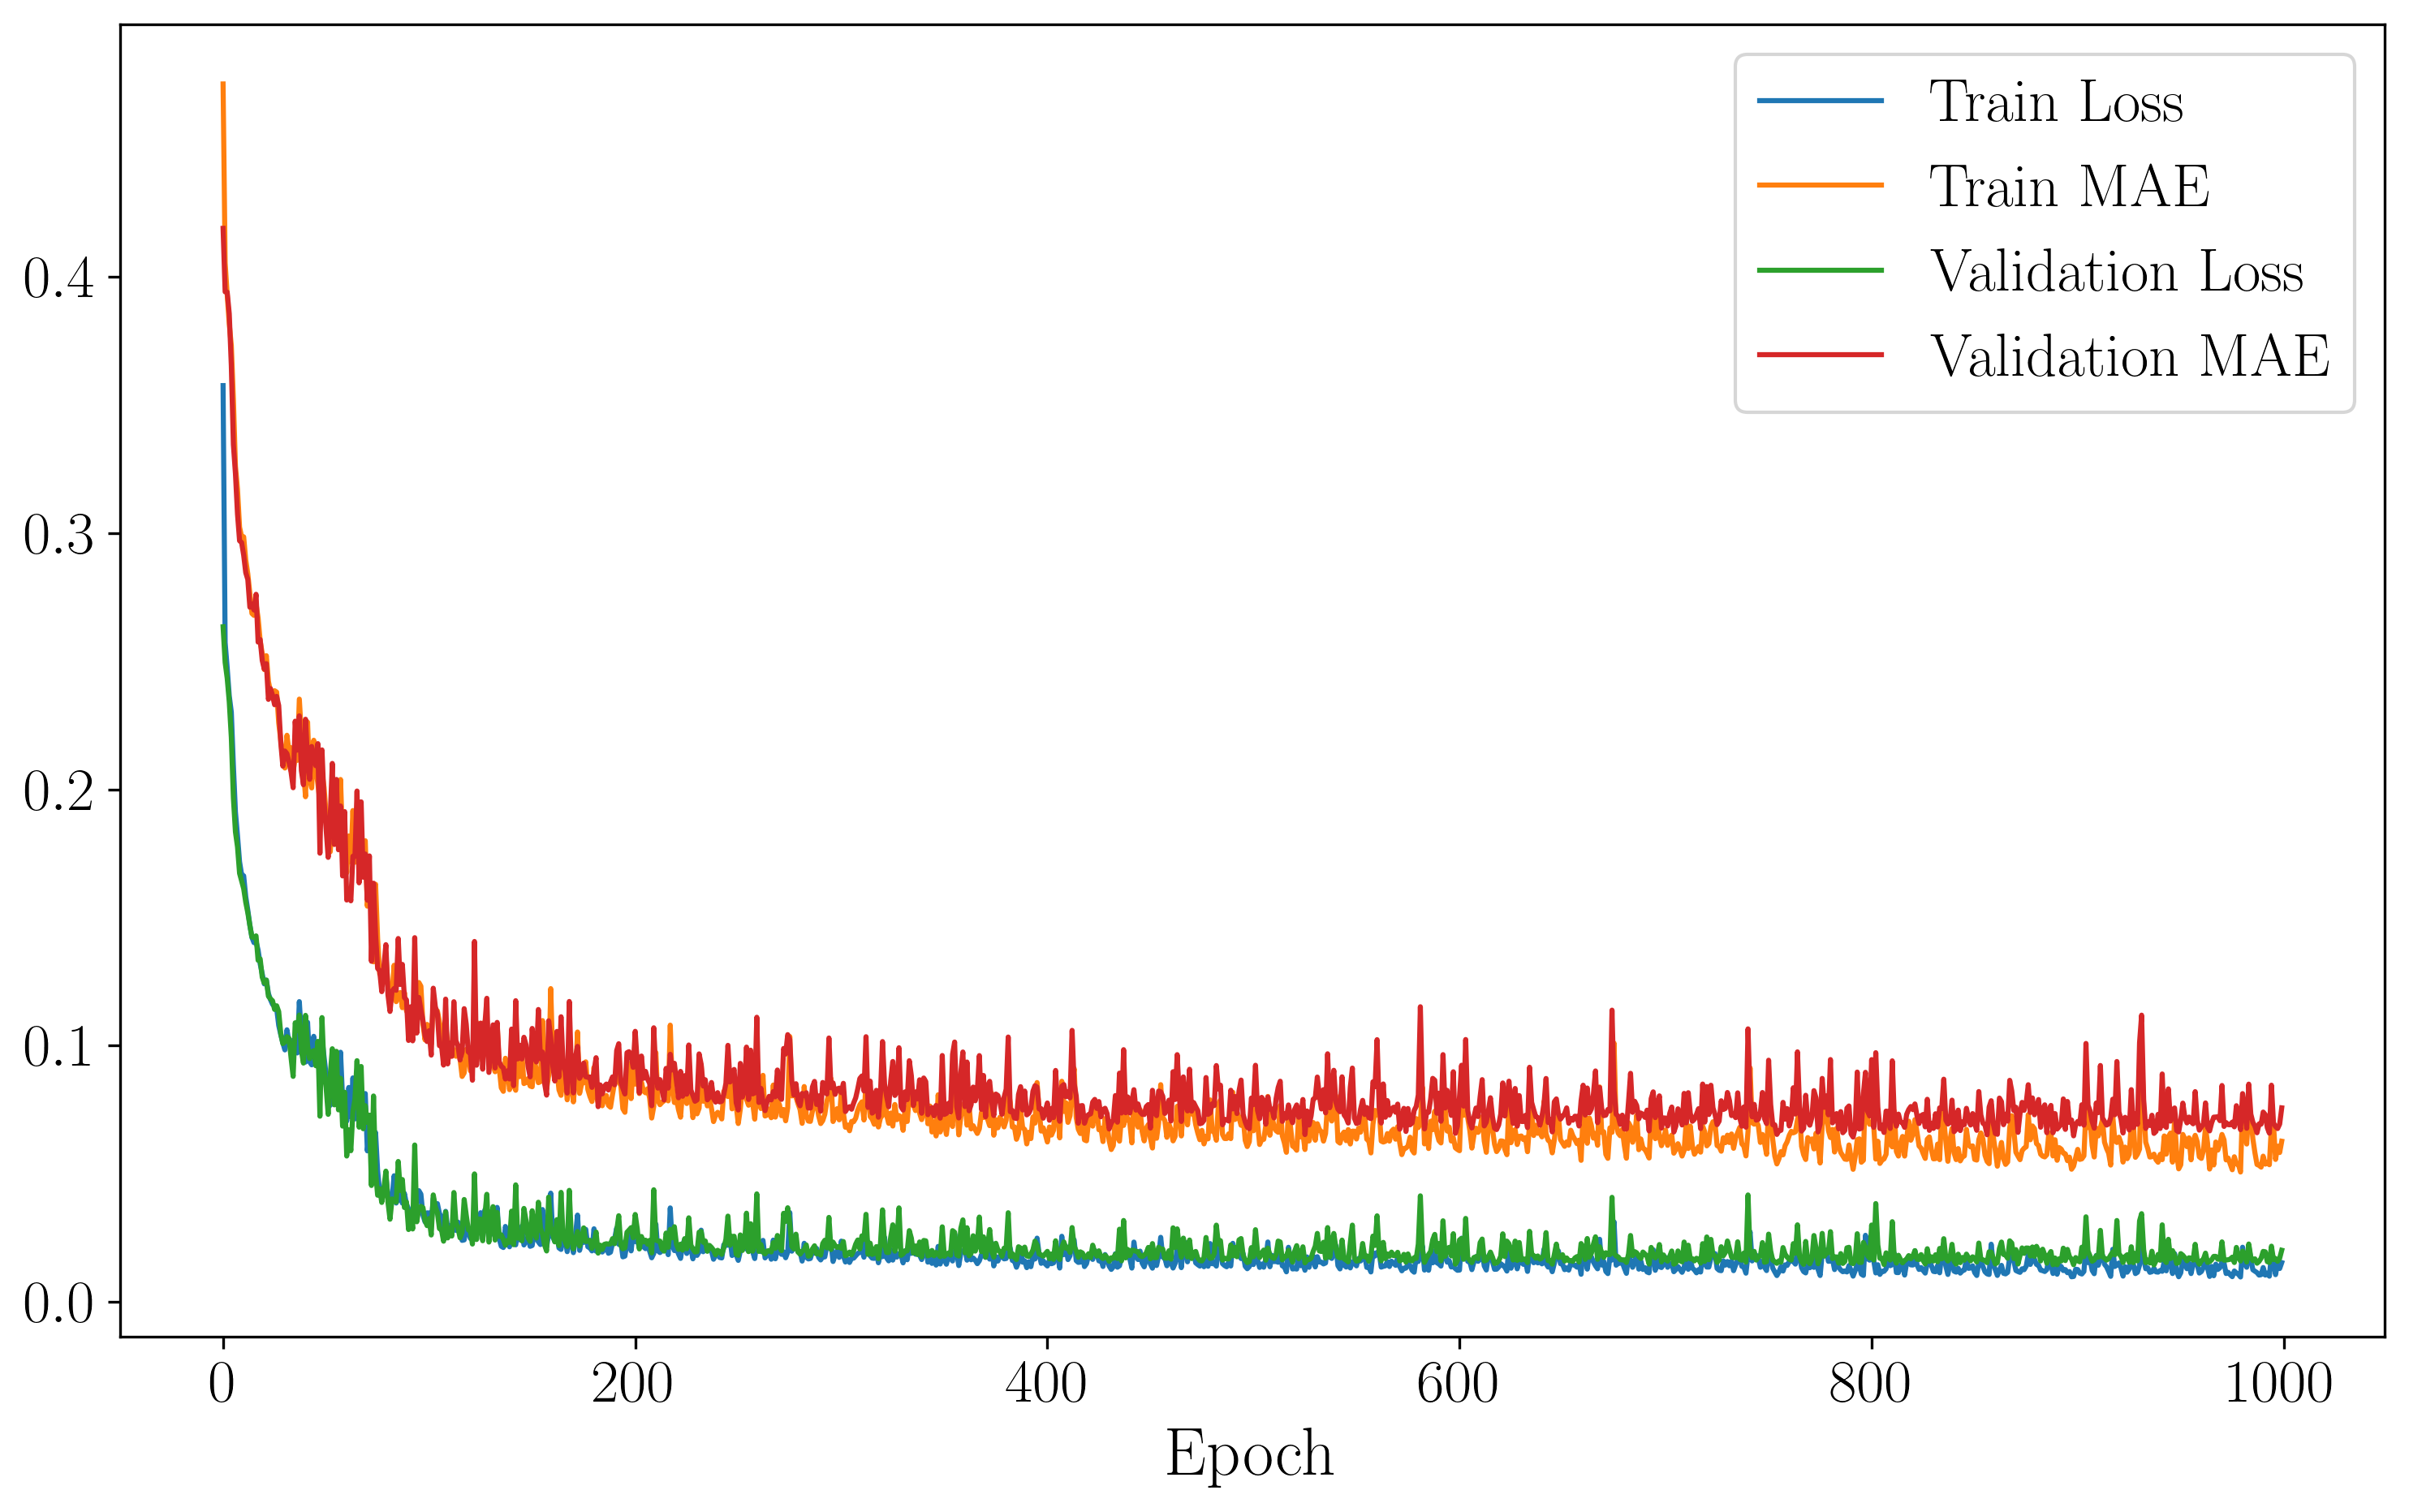

In [11]:
model =  Dense_five()

#Fiteamos el modelo
history = model.fit(x_train_norm , y_train_norm , batch_size=batch_size, validation_data=(x_val_norm, y_val_norm),
                     epochs=epochs, verbose=2)

# # Definir EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

#Guardamos el modelo y así no necesitamos entrenarlo cada vez que lo queramos usar
model.save('model_noNoise(gamma-fijo).keras') 

# Visualiza la pérdida y la métrica de entrenamiento
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### Llamamos y evaluamos

In [12]:
#LLamamos al modelo
model = models.load_model("model_noNoise(gamma-fijo).keras")

#model.summary()

#Evaluamos el modelo
scores = model.evaluate(x_test_norm, y_test_norm, verbose=0)
print('MSE:',scores[0],'\nMAE:', scores[1])  

#Predecimos los valores con nuestro modelo
y_pred_norm = model.predict(x_test_norm)

MSE: 0.019648386165499687 
MAE: 0.07670647650957108
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


#### Dibujamos los resultados

##### Predicción de cada parámetro

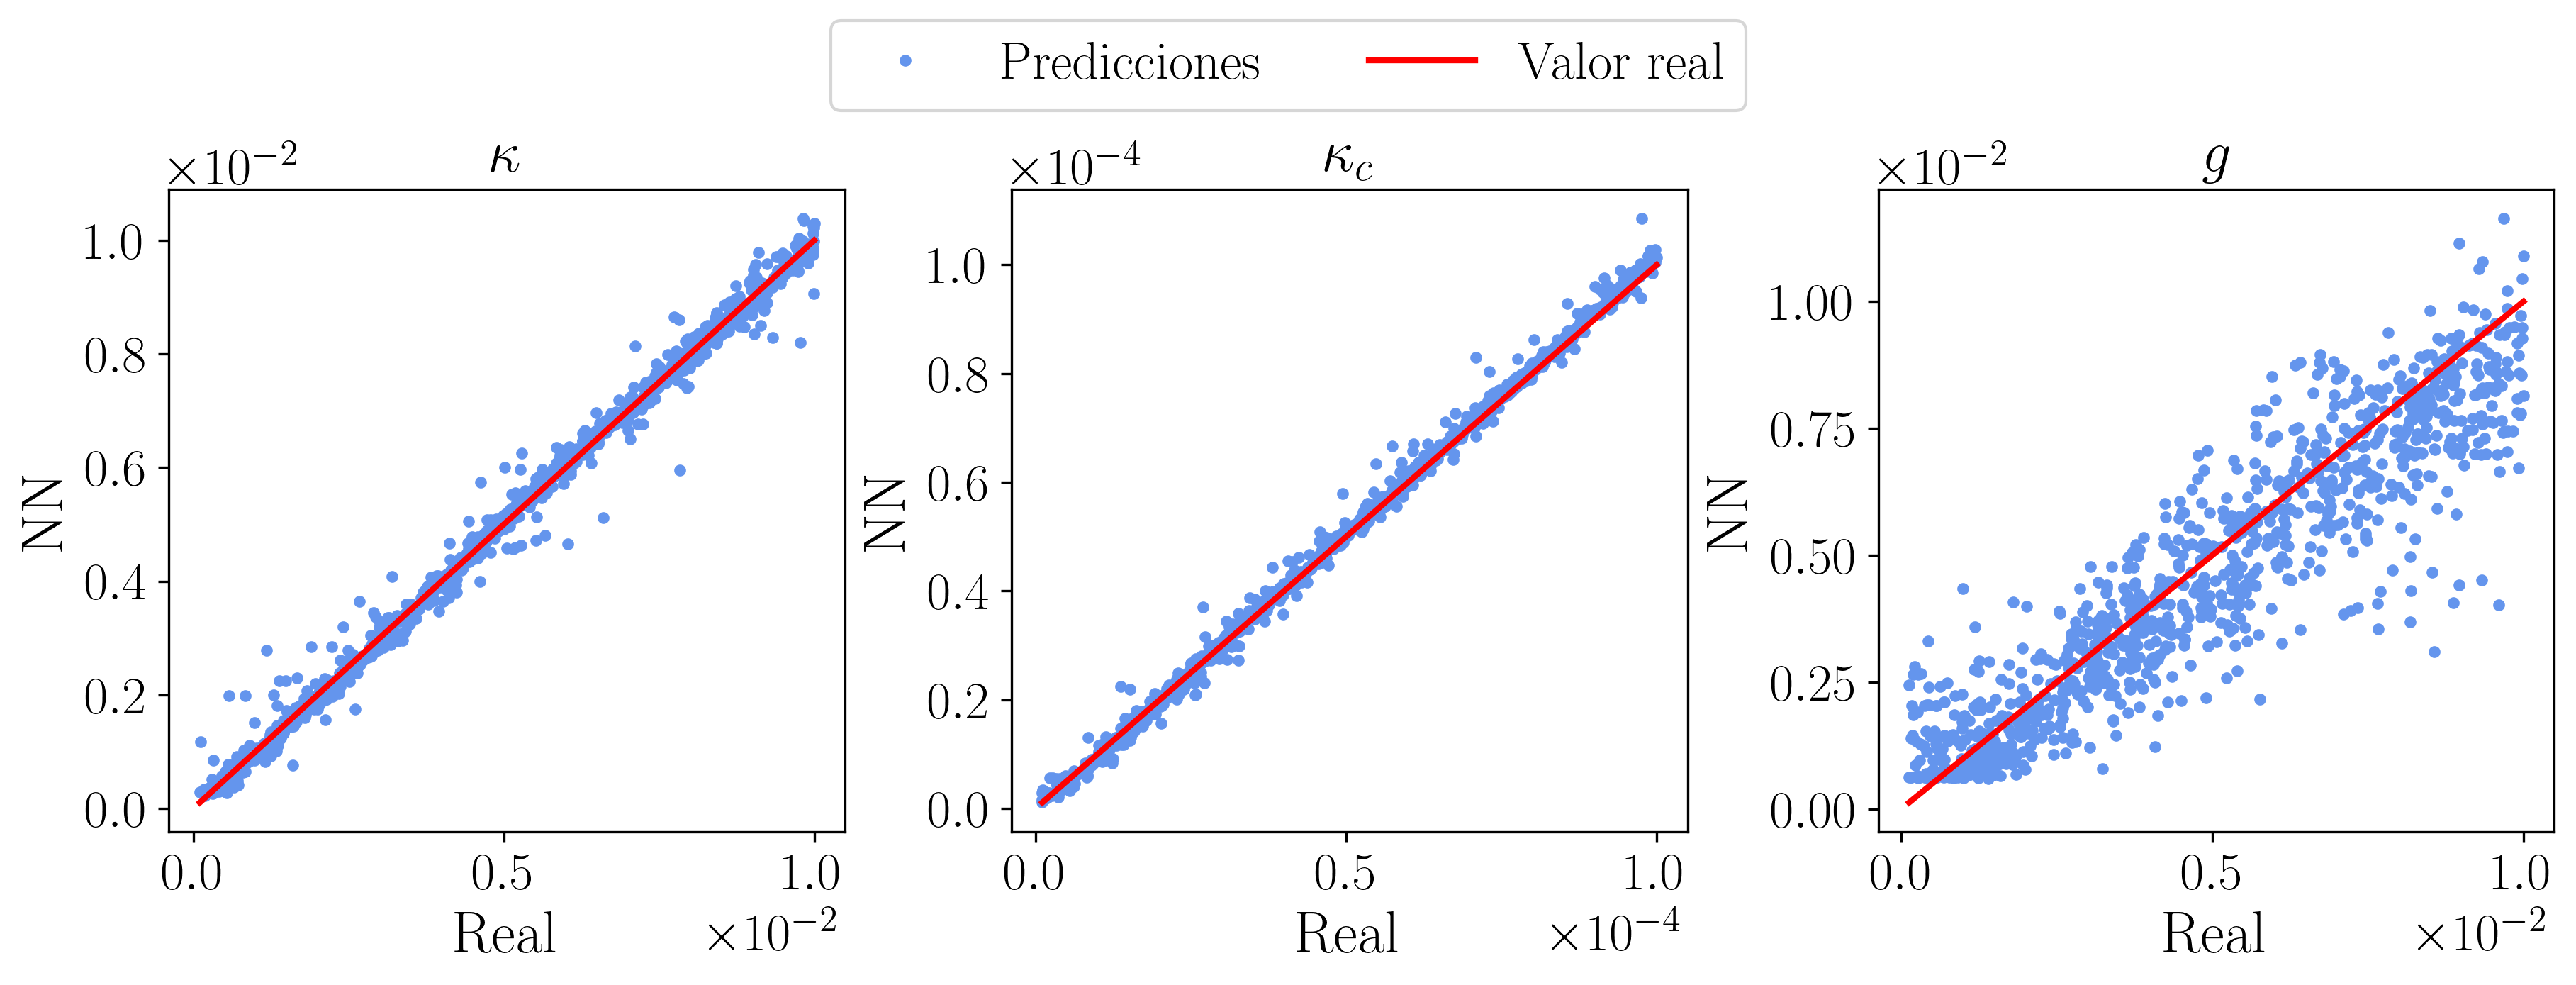

In [13]:
# Desnormalizamos los datos de salida de validación
y_test_denorm = scaler_y.inverse_transform(y_test_norm)
y_pred_denorm = scaler_y.inverse_transform(y_pred_norm)

# Dibujamos los datos
symbols = [r'$\kappa$', r'$\kappa_c$', r'$g$']

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ['cmr10'], 
    "figure.titlesize": 22,
    "axes.labelsize": 20, 
    "axes.titlesize": 20, 
    "xtick.labelsize": 18, 
    "ytick.labelsize": 18, 
    "legend.fontsize": 18,
    "figure.figsize": [12, 4], 
    "figure.dpi": 300 
})

# Crear subgráficos para cada variable
fig, axes = plt.subplots(nrows=1, ncols=3, constrained_layout=True)

# Añadir los subgráficos
for i, ax in enumerate(axes.flatten()):
    if i < y_test_denorm.shape[1]:  # Verifica que no exceda el número de columnas en los datos
        ax.plot(y_test_denorm[:, i], y_pred_denorm[:, i], marker='o', linestyle='',
                markersize=3, color='cornflowerblue')
        ax.plot([y_test_denorm[:, i].min(), y_test_denorm[:, i].max()],
                [y_test_denorm[:, i].min(), y_test_denorm[:, i].max()], linestyle='-', color='red', linewidth=2 )
        ax.set_xlabel('Real')
        ax.set_ylabel('NN')
        ax.set_title(symbols[i])
        # Aplicar notación científica a los ejes
        ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        ax.ticklabel_format(style='sci', axis='both', scilimits=(0,0))


labels = ["Predicciones", "Valor real"]
fig.legend(labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.show()




##### Curvas Validación VS Predicción

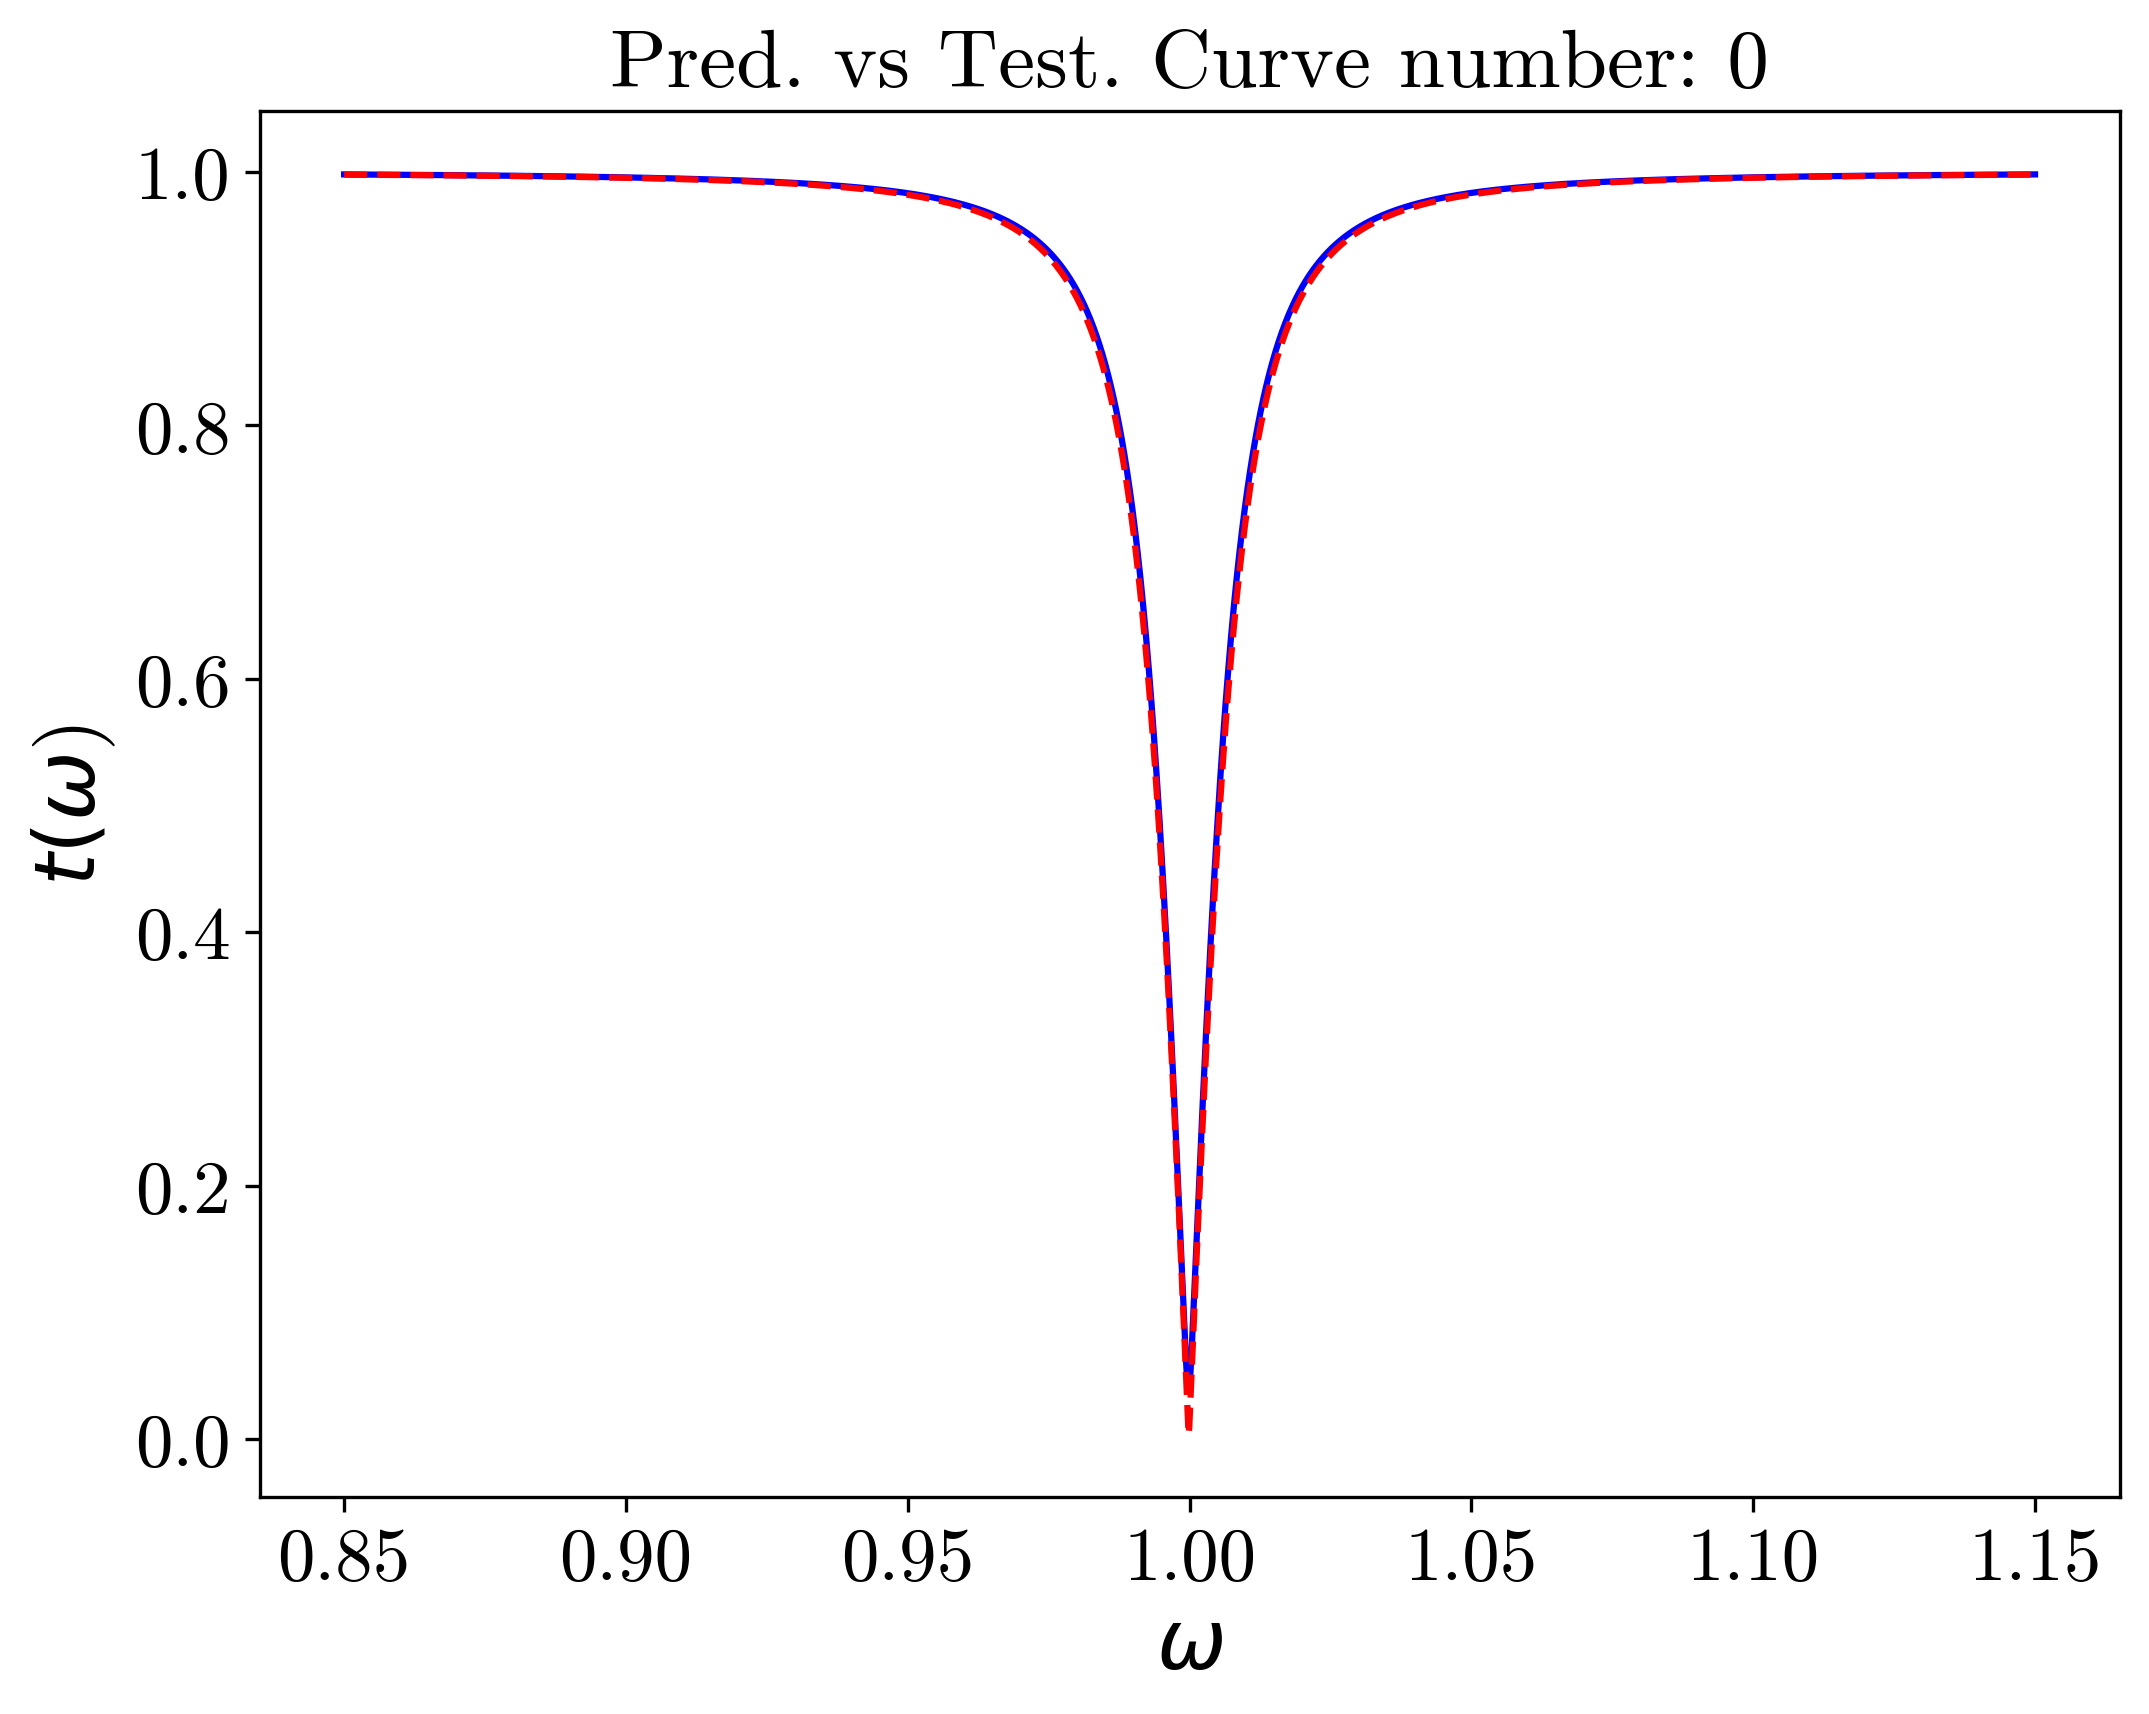

In [14]:
plt.rcParams.update({
    "text.usetex": False,
    "figure.figsize": [8,6],
})

k_pred = y_pred_denorm[:, 0]
k_test = y_test_denorm[:, 0]
kc_pred = y_pred_denorm[:, 1]
kc_test = y_test_denorm[:, 1]
g_pred = y_pred_denorm[:, 2]
g_test = y_test_denorm[:, 2]
# gamma_test = gamma[indices_test]
DeltaE_test = DeltaE[indices_test]

t_values_pred = np.zeros((x_val.shape[0], len(w_values)))
t_values_test = np.zeros((x_val.shape[0], len(w_values)))


for i in range (x_val.shape[0]):
    t_values_pred[i,:] = S21(w_values, k_pred[i], k_pred[i], Omega, DeltaE_test[i], gamma, g_pred[i])
    t_values_test[i,:] = S21(w_values, k_test[i], k_pred[i],  Omega, DeltaE_test[i], gamma, g_test[i])

# w1 = w2 = np.zeros(x_val.shape[0])

# w1=w_1(k_test, Omega, DeltaE_test, gamma_test, g_test)
# w2=w_2(k_test, Omega, DeltaE_test, gamma_test, g_test)

i = 0
while i < x_val.shape[0]:
    plt.clf()  # Limpia la figura antes de cada iteración
    plt.plot(w_values, t_values_test[i, :], color="b", label="Real")
    plt.plot(w_values, t_values_pred[i, :], color="r", linestyle="--", label="Network prediction")

    # # Calcula los valores de t(w) en w1 y w2
    # t_w1 = t_w(w1[i], k_test[i], Omega, DeltaE_test[i], gamma_test[i], g_test[i])
    # t_w2 = t_w(w2[i], k_test[i], Omega, DeltaE_test[i], gamma_test[i], g_test[i])

    # if w_values.min() <= w1[i] <= w_values.max():
    #     plt.vlines(w1[i], 0, t_w1, colors='black', linewidth=0.5)
    # if w_values.min() <= w2[i] <= w_values.max():
    #     plt.vlines(w2[i], 0, t_w2, colors='black', linewidth=0.5)

    plt.title(f"Pred. vs Test. Curve number: {i}")
    plt.xlabel(r"$\omega$")
    plt.ylabel(r"$t (\omega$)")
    #plt.legend(framealpha=1, loc='lower right')
    # plt.ylim(,1)
    # plt.xlim(2.09, 2.14)

    # Muestra los valores como un recuadro dentro de la gráfica
    text = f"$\kappa$ real = {k_test[i]:.2e}, $\kappa$ pred = {k_pred[i]:.2e}\n"\
           f"$\kappa_c$ real = {kc_test[i]:.2e}, $\kappa_c$ pred = {kc_pred[i]:.2e}\n"\
           f"g real = {g_test[i]:.2e}, g pred = {g_pred[i]:.2e}\n"\
           f"$\Delta$E = {DeltaE_test[i]:.3f}"
    # plt.text(0.011, 0.23, text, transform=plt.gca().transAxes, fontsize=14, verticalalignment='top',
    #          bbox=dict(facecolor='white', alpha=1))

    # Muestra la figura
    display(plt.gcf())
    clear_output(wait=True)

    if keyboard.is_pressed('esc'):
        break
    if keyboard.is_pressed('right'):
        i += 1
    if keyboard.is_pressed('left'):
        i -= 1
        if i < 0:
            i += 1



# Dibujos para Memoria

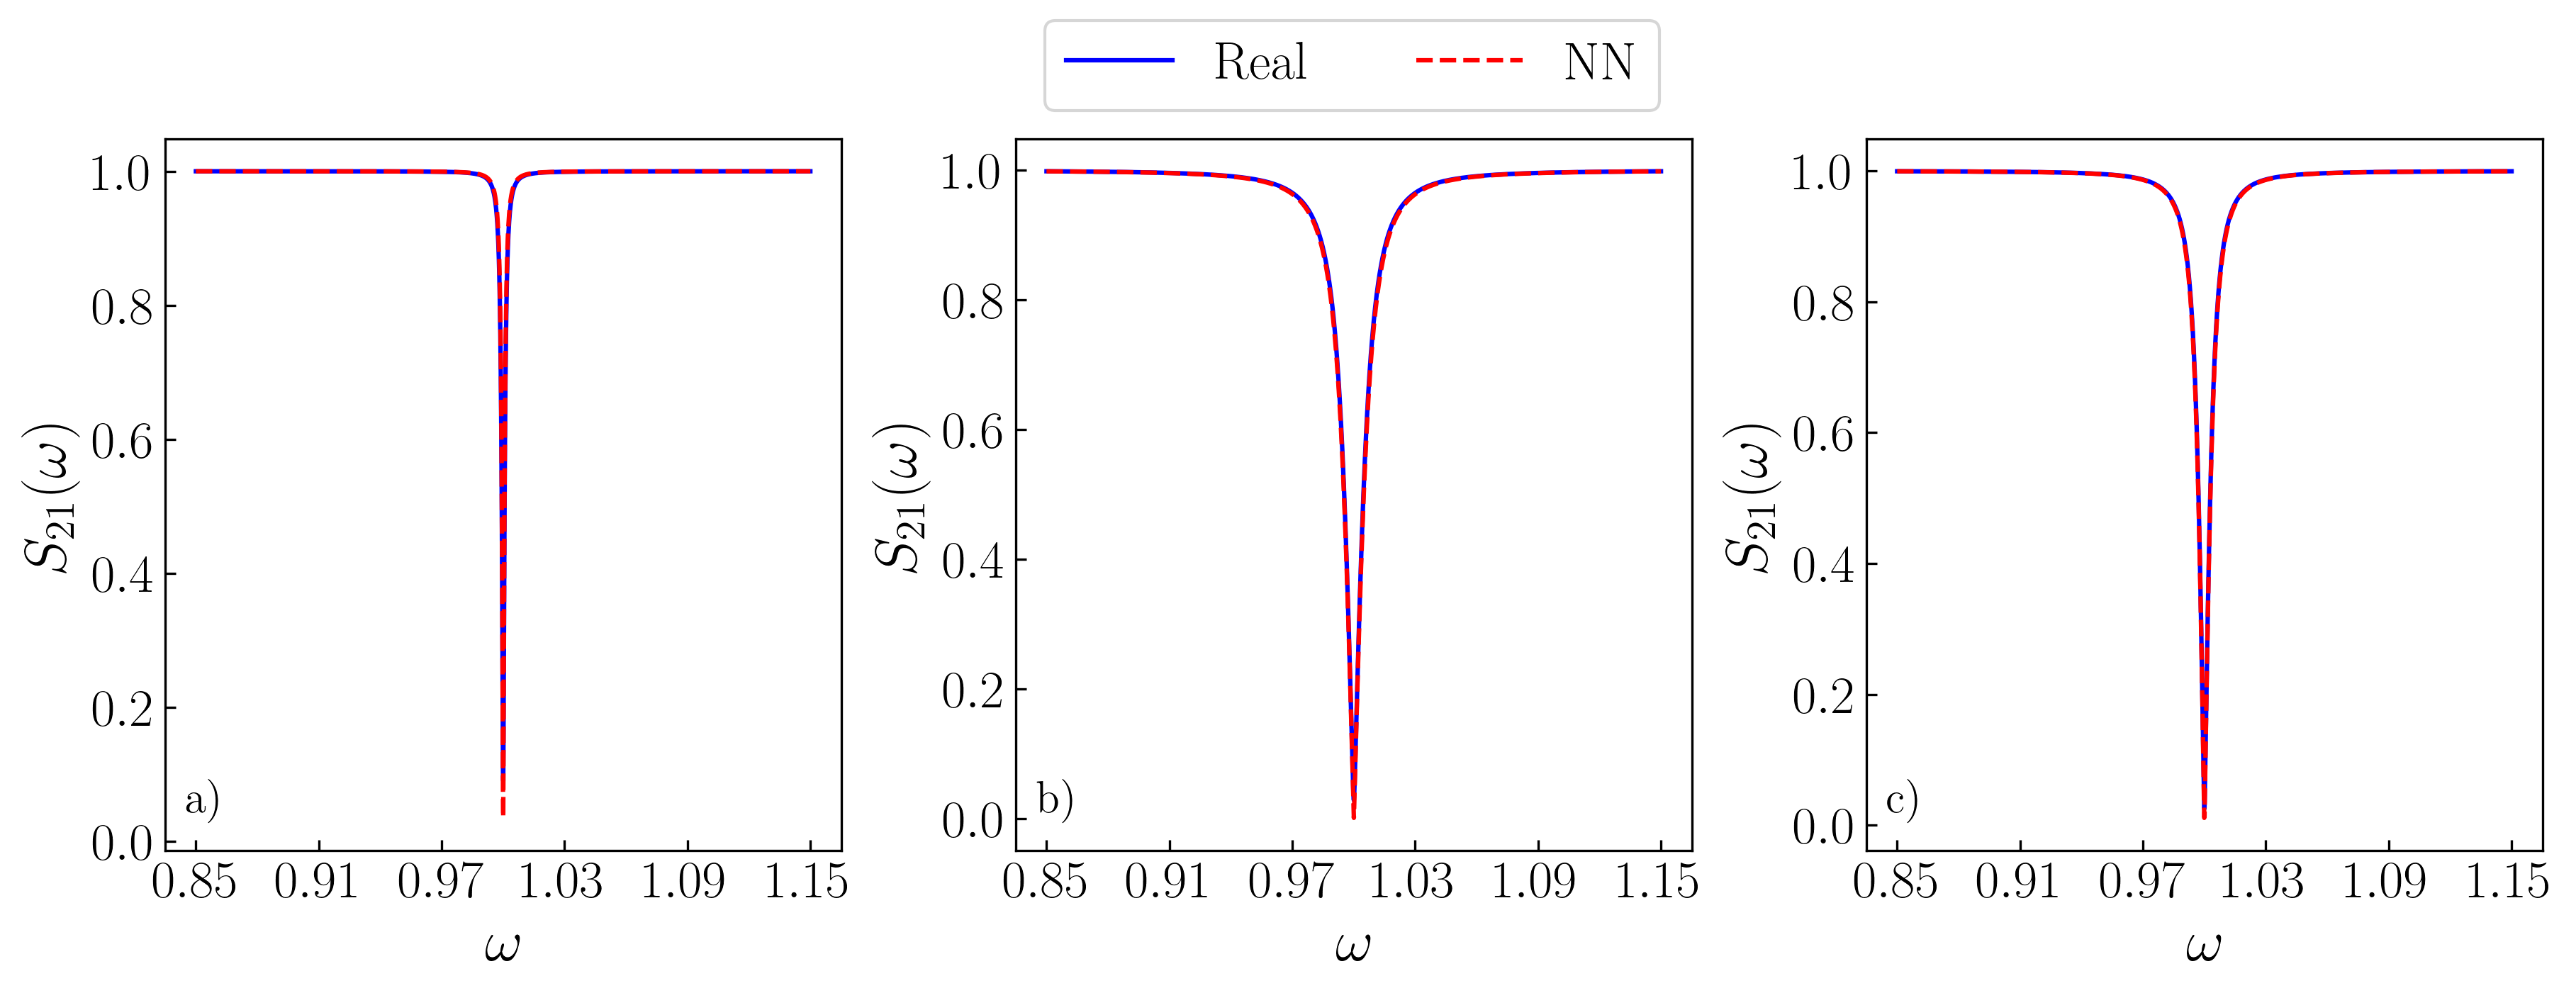

In [15]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ['cmr10'], 
    "figure.titlesize": 22,
    "axes.labelsize": 20, 
    "axes.titlesize": 20, 
    "xtick.labelsize": 18, 
    "ytick.labelsize": 18, 
    "legend.fontsize": 18,
    "figure.figsize": [12,4], 
    "figure.dpi": 300 
})


pics = [4, 24, 56]
labels_subplots = ["a)", "b)", "c)", "d)", "e)", "f)"]

fig, axes = plt.subplots(1, 3, constrained_layout=True)
for idx, (ax, i) in enumerate(zip(axes.flat, pics)):
    ax.plot(w_values, t_values_test[i, :], color="b")
    ax.plot(w_values, t_values_pred[i, :], color="r", linestyle='--')
    # ax.set_yticks(np.arange(0, 1.05, 0.2))
    ax.set_xticks(np.linspace(w_values.min(), w_values.max(), 6))
    # ax.set_ylim(-0.03, 1.05)

    ax.text(0.03, 0.1, labels_subplots[idx], transform=ax.transAxes, 
        fontsize=15, fontweight='bold', va='top', ha='left')
    
    ax.set_ylabel(r'$S_{21}(\omega)$') 
    

    # # Configurar etiquetas y ticks según la posición del subplot
    # if idx % 3 == 0:  # Primera columna
    #     ax.set_ylabel(r'$S_{21}(\omega)$')  # Etiqueta y en la columna izquierda
    # else:
    #     ax.set_yticklabels([])  # Sin etiquetas en el eje y en la columna derecha
    #     ax.tick_params(axis='y', labelleft=False)

    ax.set_xlabel(r'$\omega$')

    # if idx // 3 == 1:  # Última fila
    #     ax.set_xlabel(r'$\omega$')  # Etiqueta x en la fila inferior
    # else:
    #     ax.set_xticklabels([])  # Sin etiquetas en el eje x en la fila superior
    #     ax.tick_params(axis='x', labelbottom=False)

    ax.tick_params(axis='both', direction='in')


labels = ["Real", "NN"]
fig.legend(labels, loc='upper center', bbox_to_anchor=(0.525, 1.16), ncol=2)
plt.show()